# PCA

Welcome to **PCA (Principal Component Analysis)** —
the algorithm that gently looks at your features and says:
> “You’re all unique… but some of you are basically the same thing.” 😌

If your dataset has 100 columns, PCA swoops in to say,
> “Don’t worry, I can explain 90% of what’s going on with just 3.”

It’s basically **data compression for grown-ups** —
like zipping a giant CSV without losing too much flavor. 🗜️

---

## 🎯 Why PCA Exists

When your data has **too many correlated features**, it becomes:
- Hard to visualize 👀
- Slow to process 🐢
- Prone to overfitting 🤯

PCA helps by:
- Finding **directions (axes)** that explain the most variance in your data
- Creating **new, uncorrelated features** called *principal components*
- Keeping the important stuff while ditching the noise 🎸

---

## 🧩 The Intuition

Imagine you’re looking at a 3D cloud of data points.
PCA says:
> “Let’s rotate the cloud so the first axis (PC1) captures the most variation.”

Then it adds:
> “The second axis (PC2) will capture the next most variation — but must stay perpendicular to PC1. Because geometry is law.” 📏

Finally, it projects your data onto these new axes —
reducing the **dimension**, not the **drama**.

---

## 🧮 The Math (But Chill)

Given data matrix **X**:
1. Subtract the mean (center the data).
2. Compute the covariance matrix:
   \[
   \Sigma = \frac{1}{n-1} X^T X
   \]
3. Find eigenvalues and eigenvectors of **Σ**.
4. Sort by largest eigenvalues → these are your “most expressive” directions.
5. Project data onto top *k* eigenvectors to get your new features.

✨ Translation: “Let’s find the most interesting patterns and ignore the rest.”

---

## 📊 Example in Python

```python
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.7)
plt.title("PCA Projection (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
````

💡 *Pro tip:* Always scale your features before PCA —
otherwise, variables measured in different units (e.g., revenue vs. clicks) will start an ego war. 💰⚔️

---

## 📈 Explained Variance Ratio

After fitting PCA, check:

```python
pca.explained_variance_ratio_
```

This tells you how much of the data’s “story” each principal component explains.

Example output:

```
[0.72, 0.18, 0.05, 0.03, 0.02]
```

Meaning: “PC1 and PC2 already cover 90% of the drama — the rest are background characters.”

---

## 🧭 Business Analogy

| Scenario                           | What PCA Does                                                |
| ---------------------------------- | ------------------------------------------------------------ |
| Marketing survey with 50 questions | Finds the top 3 patterns behind all responses                |
| Financial indicators               | Extracts “market mood” from 100 correlated variables         |
| Product reviews                    | Captures main sentiment directions (quality, price, service) |
| HR performance metrics             | Reduces 20 attributes into a few strategic KPIs              |

So yes — PCA is basically your **data therapist**, summarizing chaos into clarity.

---

## 🧪 Practice Time

**Try This:**

1. Take a dataset with 10+ numeric features.
2. Apply PCA and visualize the first two components.
3. Compare clusters before and after PCA — does it make relationships clearer?
4. Bonus: Plot the *explained variance curve* to decide how many components to keep.

---

## 🧍‍♀️ Quick Recap

* PCA finds *new* axes that explain most variance.
* Reduces dimensionality → faster training, clearer insight.
* Always scale your data first!
* Don’t treat PCA as a black box — it’s math with a mission.

---

Next up: **K-Means Clustering – The Algorithm That Assigns Everyone to a Squad 💅**



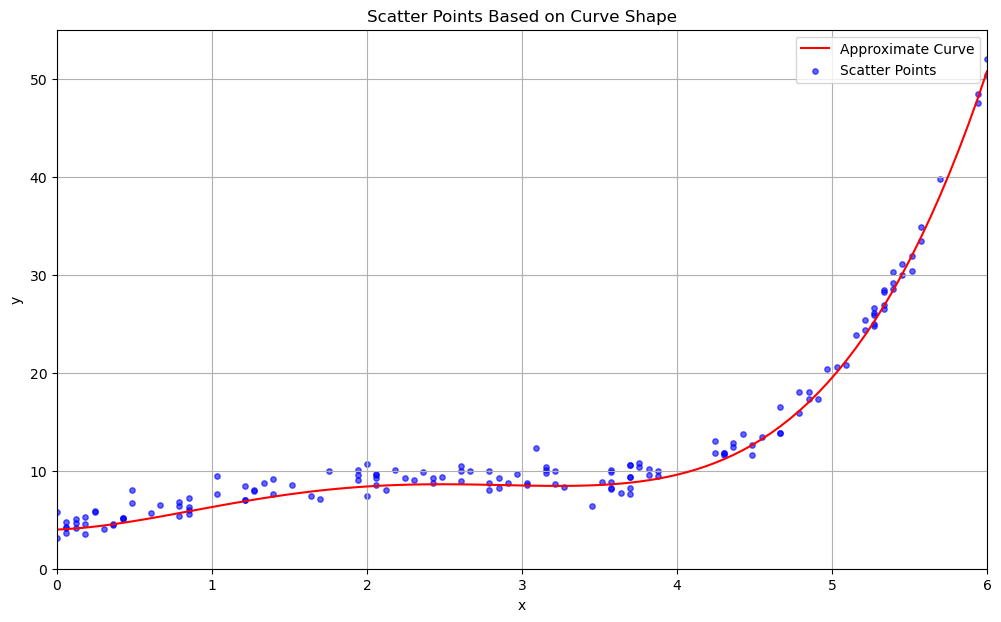

In [83]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Define x values
x = np.linspace(0, 6, 100)

# Define a 4th-degree polynomial to approximate the curve
y_base = 0.2 * x**4 - 1.5 * x**3 + 3 * x**2 + 0.5 * x + 1

# Add an increasing trend (optional, but seems present in the image)
increasing_slope = 0.1
y_trend = increasing_slope * x
y_base_increasing = y_base + y_trend

# Shift the curve to be in the positive quadrant
vertical_shift = np.abs(np.min(y_base_increasing)) + 2
y_positive = y_base_increasing + vertical_shift

# Generate random points
num_points = 150
random_indices = np.random.choice(len(x), size=num_points, replace=True)  # Allow replacement
x_points = x[random_indices]
noise_amplitude = 1  # Adjust for the amount of scatter
noise = noise_amplitude * np.random.randn(num_points)
y_points = 0.2 * x_points**4 - 1.5 * x_points**3 + 3 * x_points**2 + 0.5 * x_points + 1 + increasing_slope * x_points + vertical_shift + noise
y_points = np.abs(y_points) + 0.5  # Ensure positivity

# Create the plot
plt.figure(figsize=(12, 7))
plt.plot(x, y_positive, 'r-', label='Approximate Curve')
plt.scatter(x_points, y_points, s=15, c='blue', alpha=0.6, label='Scatter Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Points Based on Curve Shape')
plt.xlim(0, 6)
plt.ylim(0, np.max(y_points) + 3)
plt.grid(True)
plt.legend()
plt.show()

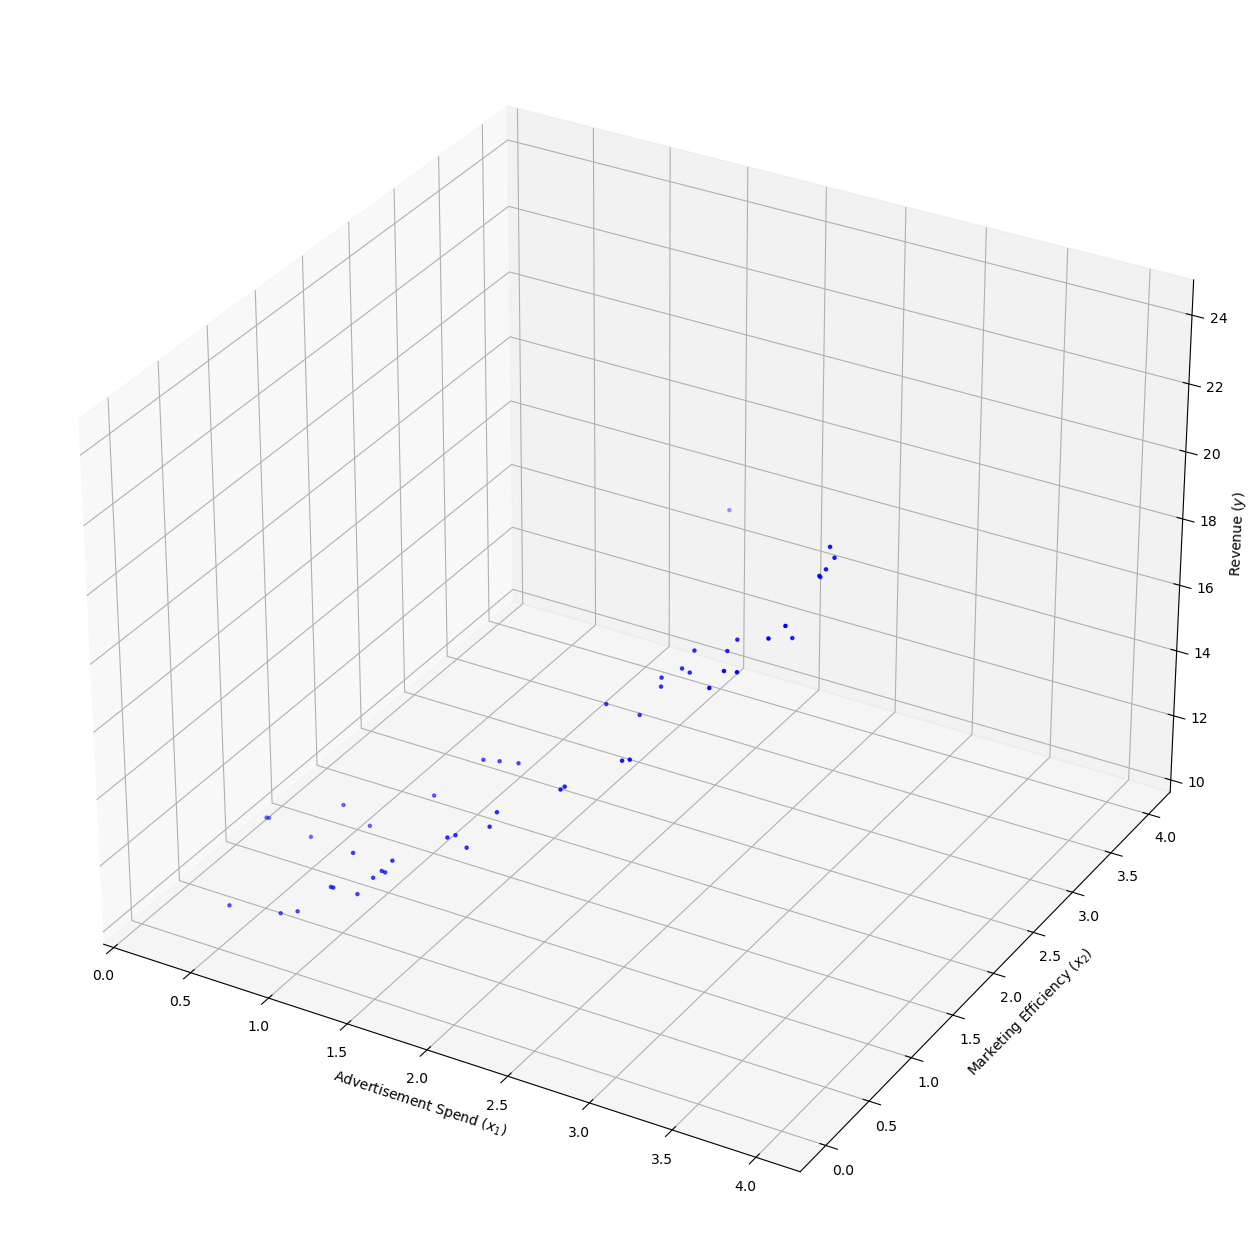

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# Seed for reproducibility
np.random.seed(50)

# Number of samples
m = 50

# Advertisement spend (x1)
X1 = 4 * np.random.rand(m, 1)

# Define Bezier curve control points for x1 and y
verts = [(0, 0), (1, 3), (3, 2), (4, 6)]

# Function to calculate Bezier curve points using de Casteljau's algorithm
def bezier(t, control_points):
    n = len(control_points) - 1
    points = np.array(control_points)
    for r in range(1, n+1):
        for i in range(n-r+1):
            points[i] = (1 - t) * points[i] + t * points[i+1]
    return points[0]

# Generate the Bezier curve
t_values = np.linspace(0, 1, m)
bezier_curve = np.array([bezier(t, verts) for t in t_values])

# Extract x2 from Bezier curve (marketing efficiency)
X2 = bezier_curve[:, 0].reshape(-1, 1)  # x2 is the first coordinate

# Revenue as a function of advertisement spend and marketing efficiency, with added noise
y = 0.5 * X1**2 + 1.5 * X1 + 10 + 0.5 * X2 + np.random.randn(m, 1) * 0.3  # Revenue

# Plotting the data in 3D
fig = plt.figure(figsize=(16, 80))
ax = fig.add_subplot(111, projection='3d')

# Plot the dataset
ax.scatter(X1, X2, y, c='b', marker='.')

# Labels and grid
ax.set_xlabel('Advertisement Spend ($x_1$)')
ax.set_ylabel('Marketing Efficiency ($x_2$)')
ax.set_zlabel('Revenue ($y$)', rotation=0)

# Display the grid
ax.grid(True)

# Show plot
plt.show()


## Normal Equations (Brief Overview)

To solve a linear regression model, we aim to minimize the squared error between predicted and actual values:

$$
\left\{
\begin{array}{rcrcl}
x^{(1)}_1 \theta_1 & + x^{(1)}_2 \theta_2 & + \cdots & + x^{(1)}_n \theta_n & = y^{(1)} \\
x^{(2)}_1 \theta_1 & + x^{(2)}_2 \theta_2 & + \cdots & + x^{(2)}_n \theta_n & = y^{(2)} \\
x^{(3)}_1 \theta_1 & + x^{(3)}_2 \theta_2 & + \cdots & + x^{(3)}_n \theta_n & = y^{(3)} \\
      \vdots       &          \vdots      &   \ddots &          \vdots      & = \vdots \\
x^{(m)}_1 \theta_1 & + x^{(m)}_2 \theta_2 & + \cdots & + x^{(m)}_n \theta_n & = y^{(m)}
\end{array}
\right.\,.
$$


$$
\vec{X} \cdot \vec{\theta} \approx \vec{y}
$$

This leads to the **normal equation**:


$$\vec{X}^\intercal\vec{X} \hat{\theta} = \vec{X}^\intercal\vec{y}$$
$$
\vec{\theta} = (\vec{X}^\intercal \vec{X})^{-1} \vec{X}^\intercal \vec{y}
$$

- Works when $(\vec{X}^\intercal \vec{X})$ is invertible.
- Not ideal for large or non-invertible $\vec{X}$.
- Often replaced with **gradient descent** for scalability and numerical stability.

> Note: $(\vec{X}^\intercal \vec{X})^{-1} \vec{X}^\intercal$ is the **Moore-Penrose pseudoinverse** of $\vec{X}$.


In business, finance, and management, the normal equation is often avoided in favor of gradient descent for large datasets due to computational and memory constraints. Here's an example:

Suppose you're building a financial model to predict stock prices using a dataset with 1 million transactions, each with 500 features (e.g., price, volume, market indicators, sentiment scores). Using the normal equation requires computing the matrix $X^TX$, where $X$ is the feature matrix of size $1,000,000 \times 500$.

### Memory Calculation:
- **Matrix size**: $X^TX$ results in a $500 \times 500$ matrix.
- **Memory per element**: Assuming double-precision floating-point (8 bytes per element).
- **Total memory**: $500 \times 500 \times 8 = 2,000,000$ bytes = $1.907$ MB for $X^TX$ alone.
- **Additional overhead**: Storing $X$ ($1,000,000 \times 500 \times 8$ bytes = $3.725$ GB) and computing the inverse of $X^TX$ further increases memory and computational costs.

In [16]:

n_transactions = 1_000_000
n_features = 500
memory_size_xtx = n_features * n_features * 8  # bytes for $X^TX$
memory_size_x = n_transactions * n_features * 8  # bytes for $X$
print("Memory for X^TX: %.3f MB" % (memory_size_xtx / 2**20))
print("Memory for X: %.3f GB" % (memory_size_x / 2**30))


Memory for X^TX: 1.907 MB
Memory for X: 3.725 GB



⸻

1. What is a Vector?

A vector is just an arrow in space. In 2D:

$$
\vec{v} = \begin{bmatrix} 3 \ 2 \end{bmatrix}
$$

This vector goes 3 units right and 2 units up from the origin.

⸻

2. What is a Matrix Transformation?

A matrix can transform vectors by stretching, rotating, or squashing them.

Let’s take a matrix:

$$
A = \begin{bmatrix} 2 & 1 \ 1 & 2 \end{bmatrix}
$$

Now apply it to a vector:

$$
A \cdot \vec{v} = \begin{bmatrix} 2 & 1 \ 1 & 2 \end{bmatrix} \cdot \begin{bmatrix} 3 \ 2 \end{bmatrix}
= \begin{bmatrix} (2)(3) + (1)(2) \ (1)(3) + (2)(2) \end{bmatrix}
= \begin{bmatrix} 8 \ 7 \end{bmatrix}
$$

So the vector was transformed to a new direction and length.

⸻

3. What is an Eigenvector?

An eigenvector of a matrix is a special vector that doesn’t change direction when the matrix is applied. It only gets stretched or shrunk.

In math:

$$
A \vec{x} = \lambda \vec{x}
$$

Where:
	•	$A$ = matrix
	•	$\vec{x}$ = eigenvector
	•	$\lambda$ = eigenvalue (scalar stretch)

⸻

4. Easy Eigenvector Example

Let’s find the eigenvectors of:

$$
A = \begin{bmatrix} 2 & 1 \ 1 & 2 \end{bmatrix}
$$

Step 1: Solve the characteristic equation

$$
\text{det}(A - \lambda I) = 0
$$

$$
\begin{vmatrix} 2 - \lambda & 1 \ 1 & 2 - \lambda \end{vmatrix} = 0
\Rightarrow (2 - \lambda)^2 - 1 = 0
\Rightarrow \lambda^2 - 4\lambda + 3 = 0
$$

$$
\Rightarrow \lambda = 1, 3
$$

So the eigenvalues are 1 and 3.

⸻

Step 2: Find eigenvectors

For $\lambda = 3$:

Solve:

$$
(A - 3I) \vec{x} = 0 \Rightarrow
\begin{bmatrix} -1 & 1 \ 1 & -1 \end{bmatrix}
\begin{bmatrix} x \ y \end{bmatrix}
= \begin{bmatrix} 0 \ 0 \end{bmatrix}
\Rightarrow x = y
$$

So one eigenvector is:

$$
\vec{v}_1 = \begin{bmatrix} 1 \ 1 \end{bmatrix}
$$

For $\lambda = 1$:

$$
(A - I) = \begin{bmatrix} 1 & 1 \ 1 & 1 \end{bmatrix}
\Rightarrow x = -y
$$

So another eigenvector is:

$$
\vec{v}_2 = \begin{bmatrix} 1 \ -1 \end{bmatrix}
$$

⸻

5. What Does It Mean Visually?
	•	Matrix $A$ stretches vectors along $[1, 1]$ and $[1, -1]$ directions.
	•	Those directions are the eigenvectors.
	•	It stretches by a factor of 3 along $[1, 1]$, and 1 along $[1, -1]$.

⸻

Why Does PCA Use Eigenvectors?

PCA finds directions (eigenvectors of the covariance matrix) that:
	•	Capture the most variance
	•	Are uncorrelated (orthogonal)
	•	Reduce dimensions while preserving information



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2x2 matrix A
A = np.array([[2, 1],
              [1, 2]])

# Define two eigenvectors of A
eigenvectors = np.array([[1, 1],   # eigenvector for λ = 3
                         [1, -1]]) # eigenvector for λ = 1

# Apply the transformation A to each eigenvector
transformed = A @ eigenvectors

# Plot setup
plt.figure(figsize=(8, 8))
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.grid(True)
plt.gca().set_aspect('equal')

# Plot original eigenvectors
plt.quiver(0, 0, eigenvectors[0, 0], eigenvectors[1, 0], color='blue', angles='xy', scale_units='xy', scale=1, label='Eigenvector λ=3')
plt.quiver(0, 0, eigenvectors[0, 1], eigenvectors[1, 1], color='green', angles='xy', scale_units='xy', scale=1, label='Eigenvector λ=1')

# Plot transformed eigenvectors
plt.quiver(0, 0, transformed[0, 0], transformed[1, 0], color='blue', linestyle='dashed', angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, transformed[0, 1], transformed[1, 1], color='green', linestyle='dashed', angles='xy', scale_units='xy', scale=1)

# Labels and legend
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend()
plt.title('Eigenvectors and Their Transformation by Matrix A')
plt.show()

Here’s your content converted to Jupyter Notebook Markdown with properly formatted LaTeX equations using $ signs for rendering:

⸻

Orthogonal vs Orthonormal Vectors

⸻

1. Orthogonal Vectors

Two vectors are orthogonal if their dot product is zero:

$$
\vec{u} \cdot \vec{v} = 0
$$

Example:

$$
\vec{u} = \begin{bmatrix} 1 \ 2 \end{bmatrix}, \quad
\vec{v} = \begin{bmatrix} 2 \ -1 \end{bmatrix}
$$

$$
\vec{u} \cdot \vec{v} = 1 \cdot 2 + 2 \cdot (-1) = 2 - 2 = 0
$$

So $\vec{u}$ and $\vec{v}$ are orthogonal.

⸻

2. Orthonormal Vectors

Vectors are orthonormal if:
	•	They are orthogonal: dot product $= 0$
	•	Each vector has unit length:

$$
|\vec{u}| = |\vec{v}| = 1
$$

Normalize:

$$
\hat{u} = \frac{\vec{u}}{|\vec{u}|}, \quad
\hat{v} = \frac{\vec{v}}{|\vec{v}|}
$$

Then $\hat{u}$ and $\hat{v}$ are orthonormal.

⸻

Python Code: Visualizing Orthogonal & Orthonormal Vectors

(You can include a matplotlib-based visualization here if needed)

⸻

Summary

Property	Orthogonal	Orthonormal
Dot product	$= 0$	$= 0$
Length	Can be any	Must be $1$
Use case	PCA bases	Orthonormal basis in QR



⸻

Want to see Gram-Schmidt to convert arbitrary vectors into an orthonormal basis?

⸻

Let me know if you’d like the visualization code or the Gram-Schmidt process in Markdown too!


⸻

Dot Product of Vectors

The dot product (also called the scalar product) is a way of multiplying two vectors that results in a single number (a scalar).

⸻

Definition:

For two vectors
$\vec{a} = [a_1, a_2, \dots, a_n], \quad \vec{b} = [b_1, b_2, \dots, b_n]$
the dot product is:

$$
\vec{a} \cdot \vec{b} = a_1b_1 + a_2b_2 + \dots + a_n b_n
$$

⸻

Geometric Interpretation:

$$
\vec{a} \cdot \vec{b} = |\vec{a}| , |\vec{b}| , \cos(\theta)
$$
	•	$|\vec{a}|$ and $|\vec{b}|$ are magnitudes (lengths) of the vectors.
	•	$\theta$ is the angle between them.

⸻

Interpretation of the Result:

1. If $\vec{a} \cdot \vec{b} = 0$:
	•	Vectors are perpendicular (orthogonal), since $\cos(90^\circ) = 0$.

2. If $\vec{a} \cdot \vec{b} > 0$:
	•	Vectors point in a similar direction (angle $< 90^\circ$).

3. If $\vec{a} \cdot \vec{b} < 0$:
	•	Vectors point in opposite directions (angle $> 90^\circ$).

4. If $\vec{a} \cdot \vec{b} = 1$:
	•	This can only happen if both vectors are unit vectors (length = 1) and point in exactly the same direction.

⸻

Example:

Let
$\vec{a} = [1, 2, 3], \quad \vec{b} = [4, -5, 6]$

Then:
$$
\vec{a} \cdot \vec{b} = (1)(4) + (2)(-5) + (3)(6) = 4 - 10 + 18 = 12
$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define orthogonal vectors
u = np.array([1, 2])
v = np.array([2, -1])

# Check orthogonality
dot_product = np.dot(u, v)
print("Dot product (should be 0):", dot_product)

# Normalize vectors (make them unit length)
u_norm = u / np.linalg.norm(u)
v_norm = v / np.linalg.norm(v)

# Plot both sets
plt.figure(figsize=(8, 8))
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.gca().set_aspect('equal')
plt.grid(True)

# Original orthogonal vectors
plt.quiver(0, 0, u[0], u[1], color='blue', angles='xy', scale_units='xy', scale=1, label='u (Orthogonal)')
plt.quiver(0, 0, v[0], v[1], color='green', angles='xy', scale_units='xy', scale=1, label='v (Orthogonal)')

# Orthonormal vectors (unit length), using alpha to distinguish
plt.quiver(0, 0, u_norm[0], u_norm[1], color='blue', alpha=0.5, angles='xy', scale_units='xy', scale=1, label='u_norm (Orthonormal)')
plt.quiver(0, 0, v_norm[0], v_norm[1], color='green', alpha=0.5, angles='xy', scale_units='xy', scale=1, label='v_norm (Orthonormal)')

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title("Orthogonal and Orthonormal Vectors")
plt.legend()
plt.show()



Dimensionality Reduction: PCA (Principal Component Analysis)
PCA is a technique for reducing the dimensionality of a dataset while preserving as much variability (information) as possible. It transforms the data into a new coordinate system where the axes (principal components) are orthogonal and aligned with the directions of maximum variance.

1. Variance Maximization & Eigen Decomposition
Objective: Find the directions (principal components) in which the data has maximum variance.
	•	Steps:
	1	Center the data by subtracting the mean of each feature.
	2	Compute the covariance matrix of the centered data.
	3	Perform eigen decomposition on the covariance matrix to obtain eigenvalues and eigenvectors.
	▪	Eigenvectors: Represent the directions of the principal components.
	▪	Eigenvalues: Represent the amount of variance explained by each principal component.
	4	Sort eigenvectors by their corresponding eigenvalues in descending order.
	5	Select the top ( k ) eigenvectors to form a projection matrix.
	6	Project the data onto the new subspace to reduce dimensionality.
	•	Variance Maximization:
	◦	The first principal component captures the direction of maximum variance.
	◦	Each subsequent component captures the maximum remaining variance, orthogonal to the previous components.
	•	Mathematical Insight: Let ( X ) be the centered data matrix (( n \times p ), where ( n ) is the number of samples and ( p ) is the number of features). The covariance matrix is: [ C = \frac{1}{n-1} X^T X ] Eigen decomposition of ( C ) gives: [ C = V \Lambda V^T ] where ( V ) is the matrix of eigenvectors, and ( \Lambda ) is a diagonal matrix of eigenvalues.

2. Singular Value Decomposition (SVD)
SVD provides an alternative way to perform PCA, often more numerically stable and efficient, especially for large datasets.
	•	SVD Decomposition: For a centered data matrix ( X ), SVD decomposes it as: [ X = U \Sigma V^T ] where:
	◦	( U ): Left singular vectors (( n \times n )).
	◦	( \Sigma ): Diagonal matrix of singular values (( n \times p )).
	◦	( V ): Right singular vectors (( p \times p )), which correspond to the principal component directions.
	◦	Singular values in ( \Sigma ) are related to the eigenvalues of the covariance matrix: ( \sigma_i^2 / (n-1) = \lambda_i ).
	•	PCA via SVD:
	◦	The principal components are the columns of ( V ).
	◦	The variance of the data along each principal component is given by the squared singular values.
	◦	To reduce dimensionality, select the top ( k ) columns of ( V ) and project the data: [ X_{\text{reduced}} = X V_k ] where ( V_k ) contains the first ( k ) columns of ( V ).
	•	Advantages of SVD:
	◦	Works directly on the data matrix, avoiding the need to compute the covariance matrix.
	◦	Numerically stable for high-dimensional or sparse data.

3. Reconstruction Error
Reconstruction error measures how much information is lost when reducing the dimensionality of the data.
	•	Reconstruction: After projecting the data onto the top ( k ) principal components, the reconstructed data is: [ \tilde{X} = X_{\text{reduced}} V_k^T = X V_k V_k^T ] where ( V_k ) is the matrix of the top ( k ) eigenvectors.
	•	Reconstruction Error: The error is the difference between the original data ( X ) and the reconstructed data ( \tilde{X} ): [ \text{Error} = | X - \tilde{X} |_F^2 ] where ( | \cdot |_F ) is the Frobenius norm.
	•	Relation to Variance: The reconstruction error is equal to the sum of the variances of the discarded principal components (i.e., the sum of the eigenvalues corresponding to the discarded eigenvectors): [ \text{Error} = \sum_{i=k+1}^p \lambda_i ]
	•	Choosing ( k ): Select ( k ) such that a sufficient percentage of the total variance (e.g., 95%) is retained: [ \text{Explained Variance Ratio} = \frac{\sum_{i=1}^k \lambda_i}{\sum_{i=1}^p \lambda_i} ]

4. Python: PCA using SVD
Below is a Python implementation of PCA using SVD with NumPy and scikit-learn for comparison.
Implementation from Scratch
import numpy as np

def pca_svd(X, k):
    # Center the data
    X_centered = X - np.mean(X, axis=0)

    # Perform SVD
    U, Sigma, Vt = np.linalg.svd(X_centered, full_matrices=False)

    # Select top k components
    V_k = Vt[:k, :]  # Principal component directions
    X_reduced = X_centered @ V_k.T  # Project data onto k components

    # Explained variance
    explained_variance = (Sigma**2) / (X.shape[0] - 1)
    explained_variance_ratio = explained_variance / np.sum(explained_variance)

    # Reconstruct data
    X_reconstructed = X_reduced @ V_k

    # Reconstruction error
    reconstruction_error = np.sum((X_centered - X_reconstructed)**2)

    return X_reduced, explained_variance_ratio[:k], reconstruction_error

# Example usage
np.random.seed(42)
X = np.random.randn(100, 5)  # 100 samples, 5 features
k = 2  # Reduce to 2 dimensions
X_reduced, explained_variance_ratio, reconstruction_error = pca_svd(X, k)

print("Reduced Data Shape:", X_reduced.shape)
print("Explained Variance Ratio:", explained_variance_ratio)
print("Reconstruction Error:", reconstruction_error)
Using scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=k)
X_reduced_sklearn = pca.fit_transform(X_scaled)

# Explained variance and reconstruction error
explained_variance_ratio_sklearn = pca.explained_variance_ratio_
X_reconstructed_sklearn = X_reduced_sklearn @ pca.components_ + pca.mean_
reconstruction_error_sklearn = np.sum((X_scaled - X_reconstructed_sklearn)**2)

print("scikit-learn Reduced Data Shape:", X_reduced_sklearn.shape)
print("scikit-learn Explained Variance Ratio:", explained_variance_ratio_sklearn)
print("scikit-learn Reconstruction Error:", reconstruction_error_sklearn)
Output Explanation
	•	Reduced Data: The transformed data in the lower-dimensional space (( n \times k )).
	•	Explained Variance Ratio: The proportion of total variance captured by each principal component.
	•	Reconstruction Error: The Frobenius norm of the difference between the original and reconstructed data.
Notes
	•	Standardizing the data (zero mean, unit variance) is recommended before applying PCA to ensure features are on the same scale.
	•	SVD is more efficient than eigen decomposition for large datasets, as it avoids computing the covariance matrix explicitly.
	•	The scikit-learn implementation is optimized and handles edge cases, making it preferable for production use.

Summary
	•	Variance Maximization: PCA finds orthogonal directions that maximize variance, computed via eigen decomposition of the covariance matrix.
	•	SVD: An efficient alternative to eigen decomposition, directly decomposing the data matrix.
	•	Reconstruction Error: Measures information loss, minimized by retaining more components.
	•	Python Implementation: SVD-based PCA can be implemented from scratch or using scikit-learn for robustness.
Let me know if you need further clarification or additional details!



⸻

What is PCA?

PCA is a dimensionality reduction technique that:
	1.	Finds directions (called principal components) along which the data varies the most.
	2.	Projects data onto a smaller number of these components, while retaining as much variance (information) as possible.

⸻

Steps Involved
	1.	Standardize the data
Remove the mean (and optionally scale to unit variance).
	2.	Compute the covariance matrix
Captures how features vary with each other.
	3.	Get eigenvectors and eigenvalues
These represent principal components and their importance.
	4.	Sort and select top k eigenvectors
Select directions with the most variance.
	5.	Project data
Reduce dimensions by projecting onto these top directions.


⸻





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def pca(X, num_components):
    # 1. Standardize
    X_meaned = X - np.mean(X, axis=0)

    # 2. Covariance matrix
    cov_matrix = np.cov(X_meaned, rowvar=False)

    # 3. Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # 4. Sort eigenvalues & eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # 5. Select top components
    eigenvectors_subset = eigenvectors[:, :num_components]

    # 6. Project data
    X_reduced = np.dot(X_meaned, eigenvectors_subset)

    return X_reduced, eigenvalues[:num_components], eigenvectors_subset

# Load data
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

# Apply PCA
X_pca, _, _ = pca(X, num_components=2)

# Plot
plt.figure(figsize=(8,6))
for target, label in enumerate(target_names):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], label=label)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset")
plt.legend()
plt.grid(True)
plt.show()



Explanation of the Plot
	•	Each point represents an Iris flower, projected from 4D to 2D.
	•	The axes are the top 2 principal components.
	•	The clusters show that PCA captures meaningful variance — e.g., Setosa is clearly separable from others.

⸻

Got it! Here’s your PCA explanation converted to Jupyter Notebook Markdown format using LaTeX equations with dollar signs ($) so it renders properly in Jupyter. Just copy and paste it into a Markdown cell:

⸻

Principal Component Analysis (PCA) - Mathematical Explanation

⸻

1. Data Representation

Let the dataset have $n$ samples and $d$ features.
We represent the data as a matrix:

$$
X =
\begin{bmatrix}
\uparrow & \uparrow & & \uparrow \
\mathbf{x}_1 & \mathbf{x}_2 & \cdots & \mathbf{x}_n \
\downarrow & \downarrow & & \downarrow \
\end{bmatrix}^\top
\in \mathbb{R}^{n \times d}
$$

Each row $\mathbf{x}_i \in \mathbb{R}^d$ is a data point (feature vector).

⸻

2. Centering the Data

PCA requires zero-centered data.

Let $\boldsymbol{\mu} \in \mathbb{R}^d$ be the mean vector:

$$
\boldsymbol{\mu} = \frac{1}{n} \sum_{i=1}^n \mathbf{x}_i
$$

Then, we subtract the mean:

$$
X_{\text{centered}} = X - \boldsymbol{\mu}
$$

⸻

3. Covariance Matrix

The covariance matrix $\Sigma \in \mathbb{R}^{d \times d}$ tells us how features vary with respect to each other:

$$
\Sigma = \frac{1}{n - 1} X_{\text{centered}}^\top X_{\text{centered}}
$$

This is a symmetric and positive semi-definite matrix.

⸻

4. Eigenvalues and Eigenvectors

We perform eigen decomposition:

$$
\Sigma \mathbf{v}_i = \lambda_i \mathbf{v}_i
$$

Where:
	•	$\lambda_i \in \mathbb{R}$ is the eigenvalue
	•	$\mathbf{v}_i \in \mathbb{R}^d$ is the corresponding eigenvector

Properties:
	•	Eigenvectors $\mathbf{v}_i$ are orthogonal (can be made orthonormal)
	•	Eigenvalues represent the variance captured along that direction

⸻

5. Sorting and Selecting Top Components

Sort eigenvalues and eigenvectors in descending order of $\lambda_i$.
Select the top $k$ eigenvectors:

$$
W_k = \left[ \mathbf{v}_1 ; \mathbf{v}_2 ; \cdots ; \mathbf{v}_k \right] \in \mathbb{R}^{d \times k}
$$

⸻

6. Projecting the Data

Now project the original data to the new $k$-dimensional subspace:

$$
Z = X_{\text{centered}} \cdot W_k, \quad \text{where} \quad Z \in \mathbb{R}^{n \times k}
$$

This is the reduced-dimensional representation of the data.

⸻

7. Summary of PCA Steps
	1.	Standardize the data
	2.	Compute covariance matrix $\Sigma$
	3.	Compute eigenvalues and eigenvectors
	4.	Sort and select top $k$ eigenvectors
	5.	Project data onto new axes

⸻

Let me know if you want a version with accompanying code snippets or visualization examples next.


# Singular value decomposition

In [ ]:
import numpy as np

def find_eigenvalues(A, tol=1e-8):
    """
    Find eigenvalues by solving the characteristic polynomial det(A - λI) = 0
    """
    print("=== Step 1: Find Eigenvalues ===")
    print("Solving det(A - λI) = 0\n")

    # Characteristic polynomial coefficients
    if A.shape == (2, 2):
        # For 2x2 matrix: λ² - (tr(A))λ + det(A) = 0
        trace = A[0,0] + A[1,1]
        det = A[0,0]*A[1,1] - A[0,1]*A[1,0]
        print(f"Characteristic equation: λ² - {trace}λ + {det} = 0")

        # Quadratic formula
        discriminant = trace**2 - 4*det
        λ1 = (trace + np.sqrt(discriminant)) / 2
        λ2 = (trace - np.sqrt(discriminant)) / 2
        eigenvalues = [λ1, λ2]

    else:
        # For larger matrices - much more complex (this is simplified)
        print("For larger matrices, we'd typically use iterative methods")
        print("But we'll use numpy's roots for demonstration:")
        char_poly = np.poly(A)
        eigenvalues = np.roots(char_poly)

    print("\nEigenvalues found:", eigenvalues)
    return np.array(eigenvalues)

def find_eigenvectors(A, eigenvalues, tol=1e-8):
    """
    Find eigenvectors by solving (A - λI)v = 0 for each eigenvalue
    """
    print("\n=== Step 2: Find Eigenvectors ===")
    eigenvectors = []

    for i, λ in enumerate(eigenvalues):
        print(f"\nFor eigenvalue λ{i+1} = {λ}:")
        M = A - λ * np.eye(A.shape[0])
        print(f"A - λ{i+1}I:\n{M}")

        # Find null space (simplified approach)
        if abs(M[0,0]) > tol and abs(M[1,1]) > tol:
            # Assume eigenvector is [1, -M[0,0]/M[0,1]]
            v = np.array([1, -M[0,0]/M[0,1]])
        else:
            v = np.array([-M[0,1]/M[0,0], 1])

        # Normalize
        v = v / np.linalg.norm(v)
        print(f"Eigenvector v{i+1}: {v}")
        eigenvectors.append(v)

    return np.array(eigenvectors).T

def demonstrate_eigen_calculation(A):
    print("=== Original Matrix ===")
    print(A)

    print("\n=== Calculating Determinant ===")
    if A.shape == (2, 2):
        det = A[0,0]*A[1,1] - A[0,1]*A[1,0]
        print(f"det(A) = {A[0,0]}*{A[1,1]} - {A[0,1]}*{A[1,0]} = {det}")
    else:
        det = np.linalg.det(A)
        print(f"det(A) = {det}")

    eigenvalues = find_eigenvalues(A)
    eigenvectors = find_eigenvectors(A, eigenvalues)

    print("\n=== Verification ===")
    for i, λ in enumerate(eigenvalues):
        v = eigenvectors[:, i]
        print(f"A @ v{i+1}: {A @ v}")
        print(f"λ{i+1} * v{i+1}: {λ * v}\n")

# Example usage
A = np.array([[4, 2],
              [1, 3]])

demonstrate_eigen_calculation(A)

In [ ]:
import numpy as np

def reconstruct_from_eigen(A):
    print("=== Original Matrix ===")
    print("A:\n", A)

    # Step 1: Find eigenvalues and eigenvectors
    print("\n=== Step 1: Eigen Decomposition ===")
    eigenvalues, eigenvectors = np.linalg.eig(A)

    print("Eigenvalues (λ):", eigenvalues)
    print("Eigenvectors (columns):\n", eigenvectors)

    # Step 2: Verify Av = λv
    print("\n=== Step 2: Verify Eigenproperties ===")
    for i in range(len(eigenvalues)):
        v = eigenvectors[:, i]
        λ = eigenvalues[i]
        print(f"A @ v{λ}: {A @ v}")
        print(f"λ * v{λ}: {λ * v}\n")

    # Step 3: Reconstruct original matrix
    print("\n=== Step 3: Matrix Reconstruction ===")
    print("Using A = V Λ V⁻¹")

    Λ = np.diag(eigenvalues)
    V = eigenvectors
    V_inv = np.linalg.inv(V)

    print("Diagonal matrix Λ:\n", Λ)
    print("Eigenvector matrix V:\n", V)
    print("Inverse of V:\n", V_inv)

    A_reconstructed = V @ Λ @ V_inv
    print("\nReconstructed A:\n", A_reconstructed)

    # Step 4: Verification
    print("\n=== Verification ===")
    print("Original A:\n", A)
    print("Reconstructed A:\n", A_reconstructed)
    print("\nReconstruction successful?", np.allclose(A, A_reconstructed))

# Example usage
A = np.array([[4, 2],
              [1, 3]])
reconstruct_from_eigen(A)

In [ ]:
import numpy as np
from scipy.linalg import svd

def demonstrate_svd_calculation(X, print_steps=True):
    """
    Demonstrate how U, s, Vt are calculated in SVD decomposition
    """
    if print_steps:
        print("=== Original Matrix ===")
        print("X:\n", X)
        print(f"Shape: {X.shape}\n")

    # Step 1: Compute X^T X and its eigenvalues/vectors
    XTX = X.T @ X
    if print_steps:
        print("=== Step 1: Compute X^T X ===")
        print("X^T X:\n", XTX)
        print(f"Shape: {XTX.shape}\n")

    # Step 2: Find eigenvalues and eigenvectors of X^T X
    eigenvalues, V = np.linalg.eig(XTX)
    eigenvalues = np.real(eigenvalues)  # Keep real part (for numerical stability)
    V = np.real(V)

    # Sort eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    V = V[:, idx]

    if print_steps:
        print("=== Step 2: Eigen Decomposition of X^T X ===")
        print("Eigenvalues (s^2):\n", eigenvalues)
        print("Eigenvectors (columns of V):\n", V)
        print("\n")

    # Step 3: Compute singular values (s) and Vt
    s = np.sqrt(np.maximum(eigenvalues, 0))  # Ensure non-negative
    Vt = V.T

    if print_steps:
        print("=== Step 3: Compute Singular Values and Vt ===")
        print("Singular values (s):\n", s)
        print("Vt (transpose of V):\n", Vt)
        print("\n")

    # Step 4: Compute U
    U = X @ V
    for i in range(len(s)):
        if s[i] > 1e-10:  # Avoid division by zero
            U[:, i] = U[:, i] / s[i]

    if print_steps:
        print("=== Step 4: Compute U ===")
        print("U (before orthogonalization):\n", U)
        print("\n")

    # Step 5: Ensure U is orthogonal (QR decomposition to fix numerical issues)
    Q, R = np.linalg.qr(U)
    U = Q

    if print_steps:
        print("=== Step 5: Orthogonalize U ===")
        print("U (after QR orthogonalization):\n", U)
        print("\n")

    # Step 6: Construct full SVD matrices
    if print_steps:
        print("=== Final SVD Components ===")
        print("U:\n", U)
        print("s:\n", s)
        print("Vt:\n", Vt)
        print("\n")

    return U, s, Vt

# Example usage with a simple matrix
if __name__ == "__main__":
    print("==== SVD CALCULATION DEMONSTRATION ====\n")

    # Create a sample matrix
    X = np.array([[1, 2],
                  [3, 4],
                  [5, 6]], dtype=float)

    # Our implementation
    print("=== Our Implementation ===")
    U_our, s_our, Vt_our = demonstrate_svd_calculation(X)

    # Compare with scipy's implementation
    print("\n=== Scipy's Implementation ===")
    U_scipy, s_scipy, Vt_scipy = svd(X, full_matrices=False)
    print("U:\n", U_scipy)
    print("s:\n", s_scipy)
    print("Vt:\n", Vt_scipy)

    # Verification
    print("\n=== Verification ===")
    print("Reconstructed matrix (our):\n", U_our @ np.diag(s_our) @ Vt_our)
    print("Reconstructed matrix (scipy):\n", U_scipy @ np.diag(s_scipy) @ Vt_scipy)
    print("Original matrix:\n", X)

In [ ]:
import numpy as np
from scipy.linalg import svd

def svd_linear_regression(X, y, print_steps=True):
    """
    Demonstrate SVD-based linear regression with explanatory print statements
    """
    # Step 1: Add bias term (column of ones)
    X = np.column_stack([np.ones(X.shape[0]), X])
    if print_steps:
        print("=== Step 1: Design Matrix (with bias column) ===")
        print("X shape:", X.shape)
        print(X[:3], "...\n")  # Show first 3 rows

    # Step 2: Compute SVD
    U, s, Vt = svd(X, full_matrices=False)
    if print_steps:
        print("=== Step 2: Singular Value Decomposition ===")
        print("U shape:", U.shape)
        print("Singular values (s):", s)
        print("Vt shape:", Vt.shape, "\n")

    # Step 3: Determine numerical rank
    tol = s.max() * max(X.shape) * np.finfo(s.dtype).eps
    rank = np.sum(s > tol)
    if print_steps:
        print("=== Step 3: Determine Numerical Rank ===")
        print("Tolerance:", tol)
        print("Effective rank:", rank, "\n")

    # Step 4: Compute pseudoinverse
    s_inv = np.zeros_like(s)
    s_inv[:rank] = 1 / s[:rank]
    Sigma_pinv = np.diag(s_inv)
    if print_steps:
        print("=== Step 4: Compute Pseudoinverse ===")
        print("Reciprocal of non-zero singular values:")
        print(s_inv)
        print("Σ⁺ (pseudoinverse of diagonal matrix):")
        print(Sigma_pinv, "\n")

    # Step 5: Calculate coefficients θ = VΣ⁺Uᵀy
    theta = Vt.T @ Sigma_pinv @ U.T @ y
    if print_steps:
        print("=== Step 5: Calculate Coefficients θ ===")
        print("θ = VΣ⁺Uᵀy")
        print("Final coefficients:")
        print(theta.flatten())

    return theta

# Example usage with simple data
if __name__ == "__main__":
    print("==== DEMONSTRATION: SVD FOR LINEAR REGRESSION ====\n")

    # Sample data (2 features + noise)
    np.random.seed(42)
    X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
    y = np.array([[3], [7], [11], [15]]) + np.random.randn(4, 1)*0.5

    print("Original data:")
    print("X:", X)
    print("y:", y, "\n")

    # Run our SVD regression
    theta = svd_linear_regression(X, y)

    # Compare with numpy's least squares
    lstq_solution = np.linalg.lstsq(np.column_stack([np.ones(X.shape[0]), X]), y, rcond=None)[0]
    print("\n=== Verification ===")
    print("Our SVD θ:", theta.flatten())
    print("Numpy lstsq θ:", lstq_solution.flatten())

# Principal Component Analysis (PCA): Deeper Mathematical Foundations

---

## 1. Variance as a Quadratic Form

The variance of data projected onto a unit vector $\mathbf{w} \in \mathbb{R}^d$ is:

$$
\text{Var}(\mathbf{w}) = \frac{1}{n-1} \sum_{i=1}^n (\mathbf{w}^\top \mathbf{x}_i)^2 = \mathbf{w}^\top \Sigma \mathbf{w}
$$

Where:
- $\Sigma$ is the covariance matrix.
- $\mathbf{w}$ is a direction vector.
- We want to find the direction $\mathbf{w}$ that maximizes the projected variance.

---

## 2. Optimization Problem in PCA

PCA can be formulated as a constrained optimization problem:

$$
\max_{\mathbf{w}} \quad \mathbf{w}^\top \Sigma \mathbf{w} \quad \text{subject to} \quad \|\mathbf{w}\| = 1
$$

This constraint ensures we are choosing a unit direction vector.

We solve this using **Lagrange multipliers**:

$$
\mathcal{L}(\mathbf{w}, \lambda) = \mathbf{w}^\top \Sigma \mathbf{w} - \lambda (\mathbf{w}^\top \mathbf{w} - 1)
$$

Taking the gradient and setting it to zero:

$$
\nabla_{\mathbf{w}} \mathcal{L} = 2\Sigma \mathbf{w} - 2\lambda \mathbf{w} = 0
\Rightarrow \Sigma \mathbf{w} = \lambda \mathbf{w}
$$

Thus, $\mathbf{w}$ must be an **eigenvector** of $\Sigma$, and $\lambda$ is the corresponding **eigenvalue**.

---

## 3. Geometric Interpretation

- Each eigenvector of $\Sigma$ defines a new axis (principal component).
- The corresponding eigenvalue tells us the **amount of variance** along that direction.
- PCA finds a **rotated coordinate system** aligned with directions of **maximum variance**.

---

## 4. Orthonormality of Eigenvectors

Because $\Sigma$ is symmetric, all its eigenvectors are:
- **Orthogonal**: $\mathbf{v}_i^\top \mathbf{v}_j = 0$ for $i \ne j$
- Can be made **orthonormal**: $\mathbf{v}_i^\top \mathbf{v}_i = 1$

Let $V \in \mathbb{R}^{d \times d}$ be the matrix of eigenvectors:

$$
V^\top V = I \quad \Rightarrow \quad V^{-1} = V^\top
$$

This allows diagonalization of $\Sigma$:

$$
\Sigma = V \Lambda V^\top
$$

Where $\Lambda$ is the diagonal matrix of eigenvalues.

---

## 5. Dimensionality Reduction with PCA

Let:
- $V_k \in \mathbb{R}^{d \times k}$ be the matrix of top $k$ eigenvectors.
- $X_{\text{centered}} \in \mathbb{R}^{n \times d}$ be the mean-centered data.

Then the reduced representation is:

$$
Z = X_{\text{centered}} V_k \in \mathbb{R}^{n \times k}
$$

This reduces the data from $d$ dimensions to $k$ dimensions.

---

## 6. Reconstruction from PCA

To reconstruct the original (approximate) data from $Z$:

$$
\hat{X} = Z V_k^\top + \boldsymbol{\mu}
$$

Where:
- $Z$: compressed data
- $V_k^\top$: maps back to original space
- $\boldsymbol{\mu}$: the mean added back

Note: This reconstruction is **lossy** but preserves the most important structure.

---

## 7. Total Variance and Explained Variance

Let the eigenvalues be $\lambda_1, \lambda_2, \dots, \lambda_d$.

- **Total variance** in data:

$$
\text{Total variance} = \sum_{i=1}^d \lambda_i = \text{trace}(\Sigma)
$$

- **Explained variance ratio** for top $k$ components:

$$
\text{Explained variance ratio} = \frac{\sum_{i=1}^k \lambda_i}{\sum_{j=1}^d \lambda_j}
$$

This ratio helps us decide how many principal components to keep.

---

Great! Let’s break this down so you can easily explain Lagrange multipliers, differentiation, and optimization in the context of PCA, using simple intuitive examples before diving into the math.

⸻

1. What is an Optimization Problem?

At its core, optimization is about finding the best solution under some constraints.

Easy example:

Maximize area of a rectangle with a fixed perimeter of 100 units.

Let sides be x and y.
	•	Objective: Maximize A = x * y
	•	Constraint: 2x + 2y = 100

This is a perfect candidate for Lagrange multipliers, where we want to maximize a function under a constraint.

⸻

2. Lagrange Multipliers Intuition

Visual analogy:

Imagine you’re on a mountain (height = objective function), but you must walk along a path (constraint curve). The highest point on the path is where the gradient of the mountain is tangent (parallel) to the gradient of the path.

⸻

3. How Lagrange Multipliers Work

If you want to maximize a function f(x, y) subject to a constraint g(x, y) = c, you define a new function:

$$
\mathcal{L}(x, y, \lambda) = f(x, y) - \lambda (g(x, y) - c)
$$

Then, take partial derivatives and set them equal to zero:

$$
\nabla_x \mathcal{L} = 0, \quad \nabla_y \mathcal{L} = 0, \quad \nabla_\lambda \mathcal{L} = 0
$$

⸻

4. A Simple, Teachable Example

Problem:

Maximize f(x, y) = xy subject to x + y = 10.

Step 1: Define Lagrangian

$$
\mathcal{L}(x, y, \lambda) = xy - \lambda (x + y - 10)
$$

Step 2: Take derivatives and set to zero
	•	\frac{\partial \mathcal{L}}{\partial x} = y - \lambda = 0
	•	\frac{\partial \mathcal{L}}{\partial y} = x - \lambda = 0
	•	\frac{\partial \mathcal{L}}{\partial \lambda} = -(x + y - 10) = 0

Step 3: Solve

From first two:
	•	y = \lambda
	•	x = \lambda → So x = y

Plug into constraint: x + x = 10 \Rightarrow x = 5, y = 5

So the max value of xy under the constraint is 25, achieved when x = y = 5.

⸻

5. Applying This to PCA

Now let’s return to PCA:

We want to maximize variance in the direction of w (projection vector), but we also want w to be a unit vector (length = 1):

Optimization form:

$$
\max_{\mathbf{w}} \mathbf{w}^\top \Sigma \mathbf{w} \quad \text{subject to} \quad \mathbf{w}^\top \mathbf{w} = 1
$$

This is just like our earlier problem!

Step 1: Create Lagrangian

$$
\mathcal{L}(\mathbf{w}, \lambda) = \mathbf{w}^\top \Sigma \mathbf{w} - \lambda (\mathbf{w}^\top \mathbf{w} - 1)
$$

Step 2: Take derivative and set to 0

We use vector calculus:
	•	\nabla_{\mathbf{w}}(\mathbf{w}^\top \Sigma \mathbf{w}) = 2\Sigma \mathbf{w}
	•	\nabla_{\mathbf{w}}(\lambda(\mathbf{w}^\top \mathbf{w})) = 2\lambda \mathbf{w}

So,

$$
2\Sigma \mathbf{w} - 2\lambda \mathbf{w} = 0 \Rightarrow \Sigma \mathbf{w} = \lambda \mathbf{w}
$$

This tells us: w must be an eigenvector of the covariance matrix Σ, and λ is the corresponding eigenvalue (which also represents variance in that direction).

⸻

6. Summary for Teaching

Concept	Example	Key Idea
Optimization	Maximize rectangle area with fixed perimeter	Finding best value under a condition
Lagrange multipliers	Solve xy with x + y = 10	Introduce a λ to handle constraint
PCA application	Maximize wᵀΣw with wᵀw = 1	Optimize variance under unit vector constraint
Result	Eigenvector equation: Σw = λw	Find principal directions (PCA axes)



⸻

Would you like me to make this into a visual-friendly Jupyter Notebook or Markdown version for class?

In [ ]:
# https://youtu.be/fkf4IBRSeEc?si=rkWEW-W7eZjTxqb0

from IPython.display import Image, display

display(Image(filename='Pca 1 Small.png'))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# 1. Generate 2D synthetic data
X, _ = make_blobs(n_samples=100, centers=1, cluster_std=2.5, random_state=42)
X = X @ [[0.6, -0.8], [0.8, 0.6]]  # rotate the blob to make PCA interesting

# 2. Perform PCA
pca = PCA(n_components=2)
pca.fit(X)

# 3. Plot original data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Data Points')

# 4. Plot the PCA-1 and PCA-2 directions
origin = np.mean(X, axis=0)  # mean of the data
for i, (component, variance) in enumerate(zip(pca.components_, pca.explained_variance_)):
    vector = component * 3 * np.sqrt(variance)  # scale for visibility
    plt.quiver(*origin, *vector, angles='xy', scale_units='xy', scale=1,
               color=['r', 'g'][i], label=f'PCA-{i+1}')

plt.axis('equal')
plt.grid(True)
plt.title('PCA - Showing PCA-1 and PCA-2 directions')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
# Step 1: Variance as a Quadratic Form
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV (ensure it's in the same directory)
df = pd.read_csv("stock_prices_2022_2023.csv", index_col="Date", parse_dates=True)

# Mean-center the data
X = df.values
X_centered = X - X.mean(axis=0)

# Compute the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Choose a random direction w (unit vector)
w = np.random.rand(X_centered.shape[1])
w = w / np.linalg.norm(w)

# Projected variance along w
projected_variance = w.T @ cov_matrix @ w
# This value is what PCA tries to maximize

# Step 2: Optimization Problem (Eigen decomposition)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvectors by descending eigenvalue
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Top principal component
principal_vector = eigenvectors[:, 0]
principal_variance = eigenvalues[0]

# Step 3: Geometric Interpretation (Plotting top 2 PCs)
Z = X_centered @ eigenvectors[:, :2]  # Project to 2D space

plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Projection onto First 2 Principal Components")
plt.grid(True)
plt.show()

# Step 4: Orthonormality of Eigenvectors
orthonormal_check = np.allclose(eigenvectors.T @ eigenvectors, np.eye(eigenvectors.shape[1]))
# This should return True

# Diagonalization
Sigma_diag = eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T
diagonalization_check = np.allclose(Sigma_diag, cov_matrix)
# This should return True

# Step 5: Dimensionality Reduction
k = 2  # reduce to 2 dimensions
V_k = eigenvectors[:, :k]
Z_k = X_centered @ V_k  # Reduced data (n x k)

# Step 6: Reconstruction from PCA
X_approx = Z_k @ V_k.T + X.mean(axis=0)

# Step 7: Explained Variance
total_variance = np.sum(eigenvalues)
explained_variance_ratio = np.cumsum(eigenvalues) / total_variance

# Plot cumulative explained variance
plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Explained Variance vs Number of Components")
plt.grid(True)
plt.axhline(0.95, color='r', linestyle='--', label='95% threshold')
plt.legend()
plt.show()

# Now you've implemented and visualized all 7 steps of PCA from scratch.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

# Load Iris dataset
X = load_iris().data
print("Original Data Shape:", X.shape)  # (150, 4)

# Step 1: Mean Centering
mean_vector = np.mean(X, axis=0)
X_centered = X - mean_vector
print("\nMean Vector Shape:", mean_vector.shape)  # (4,)
print("Centered Data Shape:", X_centered.shape)  # (150, 4)

# Step 2: Covariance Matrix
cov_matrix = np.cov(X_centered, rowvar=False)
print("\nCovariance Matrix Shape:", cov_matrix.shape)  # (4, 4)
print("Covariance Matrix:\n", np.round(cov_matrix, 2))

# Step 3: Eigen Decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print("\nUnsorted Eigenvalues:\n", eigenvalues)
print("Unsorted Eigenvectors Shape:", eigenvectors.shape)  # (4, 4)

# Step 4: Sort Eigenvalues and Eigenvectors (Descending)
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]
print("\nSorted Eigenvalues:\n", eigenvalues)

# Step 5: Select Top-k Eigenvectors (e.g., k=2)
k = 2
W = eigenvectors[:, :k]
print("\nProjection Matrix W Shape:", W.shape)  # (4, 2)
print("Top-2 Eigenvectors (W):\n", W)

# Step 6: Project Data
Z = np.dot(X_centered, W)
print("\nProjected Data Shape (Z):", Z.shape)  # (150, 2)
print("First 5 Projected Samples:\n", np.round(Z[:5], 3))

# Step 7 (Optional): Reconstruct Approximate Original Data
X_reconstructed = np.dot(Z, W.T) + mean_vector
print("\nReconstructed Data Shape:", X_reconstructed.shape)
print("First 5 Reconstructed Samples (Approx.):\n", np.round(X_reconstructed[:5], 3))

In [ ]:

# 1. Scree Plot – Explained Variance Ratio

# This helps decide how many principal components to retain.

import matplotlib.pyplot as plt

# Explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(eigenvalues) + 1), explained_variance_ratio, 'o-', color='purple')
plt.title('Scree Plot: Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(eigenvalues) + 1))
plt.grid(True)
plt.show()

# Optional: Cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(eigenvalues) + 1), cumulative_variance, 'o-', color='green')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.xticks(np.arange(1, len(eigenvalues) + 1))
plt.grid(True)
plt.axhline(y=0.95, color='red', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.show()




# 2. Original vs Reconstructed (2D Scatter Plot)

# For a 2D PCA example, plot the first two original features vs reconstructed ones.

# Only compare the first 2 features (just for 2D visualization)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.5, label='Original')
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], color='red', alpha=0.5, label='Reconstructed (k=2)')
plt.title('Original vs Reconstructed (First 2 Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()




These visuals will show:
-	How many components are needed to retain most variance.
-   How close the reconstruction is to the original data using reduced dimensions.



In [ ]:



# Step 1: Load Stock Data

import numpy as np
import pandas as pd

# Choose some stocks (diverse sectors)
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'JPM', 'TSLA', 'META', 'NVDA', 'XOM', 'UNH']

# Download adjusted close prices
data = pd.read_csv("stock_prices_2022_2023.csv", index_col="Date", parse_dates=True)

print("Price Data Shape:", data.shape)
data = data.dropna()
print("Price Data Shape:", data.shape)

# Compute daily returns
returns = data.pct_change().dropna()
print("Daily Returns Shape:", returns.shape)




# Step 2: Mean Centering

returns_centered = returns - returns.mean()




# Step 3: Covariance Matrix and PCA

# Covariance matrix
cov_matrix = np.cov(returns_centered.T)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Explained variance
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Project returns to top-2 components
k = 2
W = eigenvectors[:, :k]
returns_pca = returns_centered @ W




# Step 4: Scree Plot

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(eigenvalues) + 1), explained_variance_ratio, 'o-', color='darkorange')
plt.title('Scree Plot: Explained Variance from Stock Returns')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()





In [ ]:
# Step 5: 2D PCA Plot of Stock Clusters

# This shows how stocks cluster by return behavior.

# Transpose eigenvectors to get stock coordinates in 2D PCA space
stock_coords_2d = W.T

plt.figure(figsize=(10, 7))
for i, ticker in enumerate(tickers):
    x, y = stock_coords_2d[0, i], stock_coords_2d[1, i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, ticker, fontsize=12)

plt.title('Stocks in 2D PCA Space (Based on Return Covariance)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.axis('equal')
plt.show()



# Step 6 (Optional): Reconstruct Returns

# Approximate returns from top-k PCs
returns_reconstructed = returns_pca @ W.T + returns.mean().values

# Compare first few reconstructed vs original
print("Original:\n", np.round(returns.iloc[:5, :3], 4))
print("\nReconstructed:\n", np.round(pd.DataFrame(returns_reconstructed, columns=returns.columns).iloc[:5, :3], 4))




Interpretation
	•	The scree plot shows how many components capture the majority of market movement.
	•	The 2D stock PCA plot groups stocks with similar return profiles.
	•	The reconstruction shows how well the market structure is retained with reduced dimensions.

⸻

What This Tells You:
	•	Each cluster groups stocks that moved similarly over the date range.
	•	PCA extracts dominant return patterns, and KMeans groups those patterns.
	•	You’ll likely see tech stocks cluster together, or energy stocks cluster separately.

⸻



In [ ]:
# Your code here